In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(303, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [5]:
(df==0).sum()

Unnamed: 0      0
Age             0
Sex            97
ChestPain       0
RestBP          0
Chol            0
Fbs           258
RestECG       151
MaxHR           0
ExAng         204
Oldpeak        99
Slope           0
Ca            176
Thal            0
AHD             0
dtype: int64

In [6]:
df['Age'].mean()

54.43894389438944

In [7]:
df.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [8]:
df.mean()

C:\Users\Sayali\AppData\Local\Temp\ipykernel_5756\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Unnamed: 0    152.000000
Age            54.438944
Sex             0.679868
RestBP        131.689769
Chol          246.693069
Fbs             0.148515
RestECG         0.990099
MaxHR         149.607261
ExAng           0.326733
Oldpeak         1.039604
Slope           1.600660
Ca              0.672241
dtype: float64

In [9]:
df[df['Ca'].isnull()].index.tolist()

[166, 192, 287, 302]

In [10]:
df.iloc[[166]]

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
166,167,52,1,nonanginal,138,223,0,0,169,0,0.0,1,NaN,normal,No


In [11]:
df['Ca'].fillna(df['Ca'].mean(), inplace=True)

In [12]:
df.isna().sum().sum()

2

In [13]:
df.mean()

C:\Users\Sayali\AppData\Local\Temp\ipykernel_5756\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Unnamed: 0    152.000000
Age            54.438944
Sex             0.679868
RestBP        131.689769
Chol          246.693069
Fbs             0.148515
RestECG         0.990099
MaxHR         149.607261
ExAng           0.326733
Oldpeak         1.039604
Slope           1.600660
Ca              0.672241
dtype: float64

In [14]:
df.iloc[[166]]

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
166,167,52,1,nonanginal,138,223,0,0,169,0,0.0,1,0.672241,normal,No


In [15]:
df = df[df['Thal'].notna()]

In [16]:
df2 = df.filter(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol'])

In [17]:
print(df['ChestPain'].unique())

['typical' 'asymptomatic' 'nonanginal' 'nontypical']


In [18]:
X = df2.replace(to_replace=dict(typical=1 ,asymptomatic=2 ,nonanginal=3 ,nontypical=4))
X = X / X.max()

In [19]:
df3 = df.filter(['AHD'])

In [20]:
y = df3.replace(dict(No=0, Yes=1))

In [21]:
print("X size: ", X.shape)
print("y size: ", y.shape)

X size:  (301, 5)
y size:  (301, 1)


In [22]:
import matplotlib.pyplot as plt

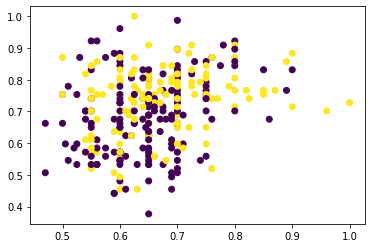

In [38]:
plt.scatter(X['RestBP'], X['Age'] , c= y.values.tolist())

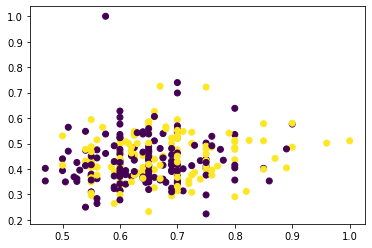

In [42]:
plt.scatter(X['RestBP'], X['Chol'] , c= y.values.tolist())

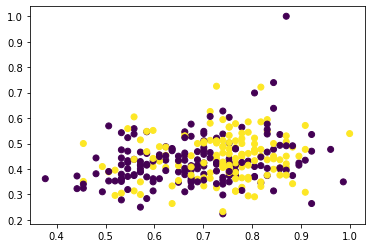

In [45]:
plt.scatter(X['Age'], X['Chol'] , c= y.values.tolist())

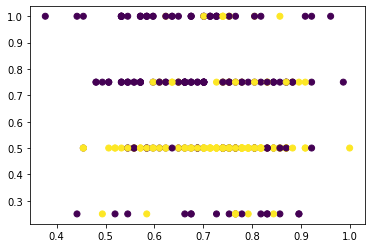

In [47]:
plt.scatter(X['Age'], X['ChestPain'] , c= y.values.tolist())